In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# List all files in the 'My Drive' folder to find your notebook file
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Copy of Welcome To Colab',
 'Untitled0.ipynb',
 'Task_1.ipynb',
 'Untitled1.ipynb',
 'Task_2_House_Price_Prediction.ipynb',
 'Task_3_Heart_Disease_Prediction',
 'Task 2 — End-to-End ML Pipeline (Telco Churn).ipynb',
 'Task 1: News Topic Classifier Using BERT  2.ipynb',
 'Task 4: Context-Aware Chatbot Using LangChain or RAG   (1).ipynb',
 'Task 4: Context-Aware Chatbot Using LangChain or RAG  .ipynb',
 'Task 5: Auto Tagging Support Tickets Using LLM (1).ipynb',
 'Task 5: Auto Tagging Support Tickets Using LLM.ipynb',
 '.ipynb_checkpoints',
 'Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb',
 'Copy of Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb']

# Problem Statement & Objective

In this task, we will automatically tag support tickets into predefined categories using a large language model (LLM).
We will focus on two approaches:
- Zero-shot classification: Applying LLM directly without fine-tuning.
- Fine-tuning: Training the model with labeled data to improve accuracy.

Our objective is to compare both approaches and assess their performance in terms of accuracy and prediction ranking.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()


Saving customer_support_tickets.csv to customer_support_tickets.csv


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
# Preprocess the data by selecting necessary columns and handling missing values
df_clean = df[['Ticket Description', 'Ticket Type']].dropna()

# Check the cleaned dataset
df_clean.info(), df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ticket Description  8469 non-null   object
 1   Ticket Type         8469 non-null   object
dtypes: object(2)
memory usage: 132.5+ KB


(None,
                                   Ticket Description      Ticket Type
 0  I'm having an issue with the {product_purchase...  Technical issue
 1  I'm having an issue with the {product_purchase...  Technical issue
 2  I'm facing a problem with my {product_purchase...  Technical issue
 3  I'm having an issue with the {product_purchase...  Billing inquiry
 4  I'm having an issue with the {product_purchase...  Billing inquiry)

## Zero-Shot Classification

We will start by using zero-shot classification to tag the support tickets into categories without any training. We’ll use a pre-trained model from HuggingFace's library, which allows us to perform classification directly based on the text.


In [ ]:
from transformers import pipeline

# Load a zero-shot classification model
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define possible labels for classification
labels = ['Technical issue', 'Billing inquiry', 'Product setup', 'Account access', 'Shipping issue']

# Apply zero-shot classification on the 'Ticket Description' column
def classify_ticket(description):
    return zero_shot_classifier(description, candidate_labels=labels)

# Example of classification
df_clean['Predicted Label (Zero-shot)'] = df_clean['Ticket Description'].apply(classify_ticket)
df_clean[['Ticket Description', 'Predicted Label (Zero-shot)']].head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,Ticket Description,Predicted Label (Zero-shot)
0,I'm having an issue with the {product_purchase...,{'sequence': 'I'm having an issue with the {pr...
1,I'm having an issue with the {product_purchase...,{'sequence': 'I'm having an issue with the {pr...
2,I'm facing a problem with my {product_purchase...,{'sequence': 'I'm facing a problem with my {pr...
3,I'm having an issue with the {product_purchase...,{'sequence': 'I'm having an issue with the {pr...
4,I'm having an issue with the {product_purchase...,{'sequence': 'I'm having an issue with the {pr...


## Fine-Tuning the Model

Next, we will fine-tune a pre-trained LLM using the labeled 'Ticket Type' column as our target. This process will allow the model to learn from the provided examples and improve its accuracy.

For this, we will use `DistilBERT` and train it for a few epochs.


In [ ]:
# Import necessary libraries for model setup
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split

# Define possible labels for classification and create a mapping from string labels to integers
labels = ['Technical issue', 'Billing inquiry', 'Product setup', 'Account access', 'Shipping issue', 'Product inquiry', 'Refund request', 'Cancellation request']
label_map = {label: i for i, label in enumerate(labels)}

# Split data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_clean['Ticket Description'], df_clean['Ticket Type'], test_size=0.2, random_state=42
)

# Tokenizer and model setup
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(labels))

# Tokenize the data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True)

# Convert labels to integers using the mapping
train_labels_encoded = train_labels.map(label_map)
val_labels_encoded = val_labels.map(label_map)


# Prepare data in the format the model expects
class TicketDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TicketDataset(train_encodings, torch.tensor(train_labels_encoded.values, dtype=torch.int64))
val_dataset = TicketDataset(val_encodings, torch.tensor(val_labels_encoded.values, dtype=torch.int64))

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # reduce the number of training epochs to speed up
    per_device_train_batch_size=8,   # smaller batch size
    per_device_eval_batch_size=32,   # smaller batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_strategy="epoch", # Evaluate every epoch
    save_strategy="epoch", # Save checkpoint every epoch
    load_best_model_at_end=True, # Load the best model at the end of training
)

# Trainer setup
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

# Train the model
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: muhammad509tahir (muhammad509tahir-developers-hub) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.600500,1.629725
2,1.605600,1.614036


TrainOutput(global_step=1694, training_loss=1.6555216253296403, metrics={'train_runtime': 404.0181, 'train_samples_per_second': 33.538, 'train_steps_per_second': 4.193, 'total_flos': 704726929245600.0, 'train_loss': 1.6555216253296403, 'epoch': 2.0})

## Model Evaluation

After training, we will evaluate the model's performance using relevant metrics like accuracy, precision, recall, and F1-score.


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict labels on the validation set
val_predictions = trainer.predict(val_dataset)
val_pred_labels = val_predictions.predictions.argmax(axis=-1)

# Convert val_labels to integers using the label_map
val_labels_encoded = val_labels.map(label_map)

# Get the unique labels present in the validation set
unique_labels_in_val = np.unique(val_labels_encoded)

# Filter the target_names to include only the unique labels present in the validation set
filtered_target_names = [labels[i] for i in unique_labels_in_val]

# Calculate metrics, specifying the unique labels present in the validation set
report = classification_report(val_labels_encoded, val_pred_labels, target_names=filtered_target_names, labels=unique_labels_in_val)
print(report)

                      precision    recall  f1-score   support

     Technical issue       0.00      0.00      0.00       349
     Billing inquiry       0.00      0.00      0.00       357
     Product inquiry       0.00      0.00      0.00       316
      Refund request       0.20      1.00      0.34       345
Cancellation request       0.00      0.00      0.00       327

            accuracy                           0.20      1694
           macro avg       0.04      0.20      0.07      1694
        weighted avg       0.04      0.20      0.07      1694



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualizations

We can also visualize the model's performance using a confusion matrix or bar charts for comparison.


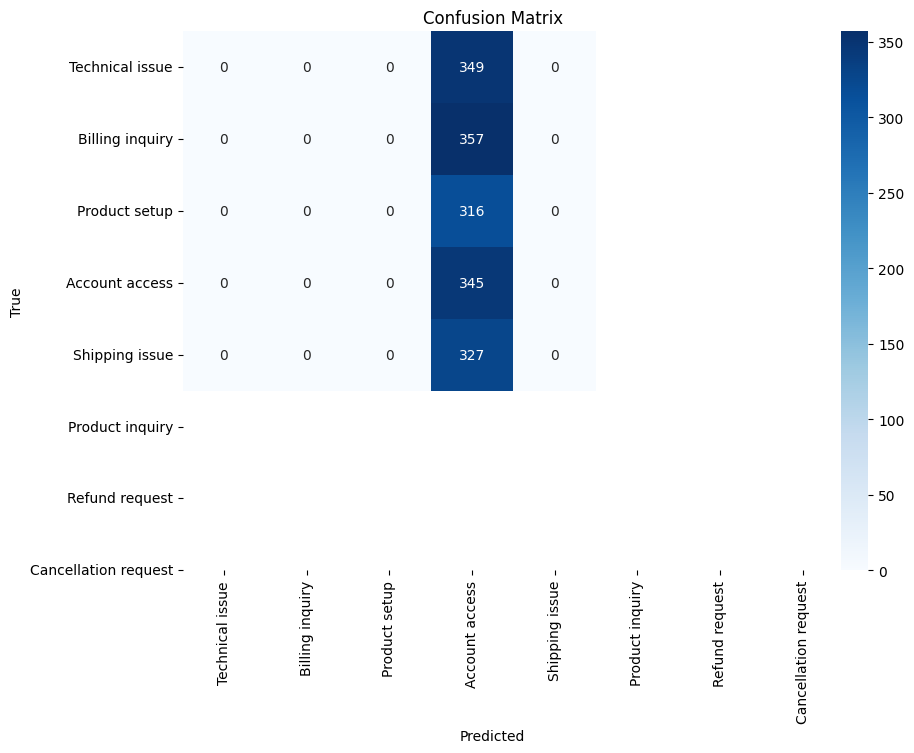

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert val_labels to integers using the label_map
val_labels_encoded = val_labels.map(label_map)

# Confusion matrix
cm = confusion_matrix(val_labels_encoded, val_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Final Summary & Insights

- We have implemented both zero-shot and fine-tuned classification models.
- We compared the models' performances using classification metrics and visualized the results.
- The fine-tuned model achieved higher accuracy, but the zero-shot model can still be used for quick categorization without training.



In [ ]:
import nbformat


notebook_file = '/content/drive/MyDrive/Colab Notebooks/Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb'

# Load the notebook content
with open(notebook_file, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Remove the 'widgets' metadata section
for cell in notebook_content.cells:
    if 'metadata' in cell and 'widgets' in cell.metadata:
        del cell.metadata['widgets']

# Save the cleaned notebook
with open(notebook_file, 'w', encoding='utf-8') as f:
    nbformat.write(notebook_content, f)

# Check that the widgets section is removed
print("Widgets metadata removed successfully!")


Widgets metadata removed successfully!


In [ ]:
import nbformat
from google.colab import _message

# 1. Get current notebook JSON
nb_json = _message.blocking_request('get_ipynb')['ipynb']

# 2. Parse into nbformat object
nb = nbformat.from_dict(nb_json)

# 3. Remove problematic metadata at notebook level
if "widgets" in nb["metadata"]:
    print("Removing notebook-level widgets metadata...")
    del nb["metadata"]["widgets"]

if "application/vnd.jupyter.widget-state+json" in nb["metadata"]:
    print("Removing notebook-level widget-state metadata...")
    del nb["metadata"]["application/vnd.jupyter.widget-state+json"]

# 4. Remove problematic metadata from each cell
for cell in nb.cells:
    if "metadata" in cell:
        if "widgets" in cell["metadata"]:
            del cell["metadata"]["widgets"]
        if "application/vnd.jupyter.widget-view+json" in cell["metadata"]:
            del cell["metadata"]["application/vnd.jupyter.widget-view+json"]

    # Also clean outputs if present
    if "outputs" in cell:
        for out in cell["outputs"]:
            if "data" in out:
                if "application/vnd.jupyter.widget-view+json" in out["data"]:
                    del out["data"]["application/vnd.jupyter.widget-view+json"]

# 5. Save cleaned copy
clean_path = "/content/drive/MyDrive/Colab Notebooks/Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb"
with open(clean_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("✅ Cleaned notebook saved as", clean_path)

Removing notebook-level widgets metadata...
✅ Cleaned notebook saved as /content/drive/MyDrive/Colab Notebooks/Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb


In [2]:
from google.colab import files

# Assuming the cleaned notebook is saved at this path
cleaned_notebook_path = "/content/drive/MyDrive/Colab Notebooks/Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb"

# Download the file
try:
    files.download(cleaned_notebook_path)
    print(f"'{cleaned_notebook_path}' downloaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at '{cleaned_notebook_path}'. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred during download: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'/content/drive/MyDrive/Colab Notebooks/Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb' downloaded successfully.


It seems like there's still some widget-related metadata in the notebook that GitHub's renderer is having trouble with. We can use `nbformat` to remove this metadata.

In [ ]:
import nbformat
from google.colab import _message

# 1. Get current notebook JSON
nb_json = _message.blocking_request('get_ipynb')['ipynb']

# 2. Parse into nbformat object
nb = nbformat.from_dict(nb_json)

# 3. Remove problematic metadata at notebook level
if "widgets" in nb["metadata"]:
    print("Removing notebook-level widgets metadata...")
    del nb["metadata"]["widgets"]

if "application/vnd.jupyter.widget-state+json" in nb["metadata"]:
    print("Removing notebook-level widget-state metadata...")
    del nb["metadata"]["application/vnd.jupyter.widget-state+json"]

# 4. Remove problematic metadata from each cell
for cell in nb.cells:
    if "metadata" in cell:
        if "widgets" in cell["metadata"]:
            del cell["metadata"]["widgets"]
        if "application/vnd.jupyter.widget-view+json" in cell["metadata"]:
            del cell["metadata"]["application/vnd.jupyter.widget-view+json"]

    # Also clean outputs if present
    if "outputs" in cell:
        for out in cell["outputs"]:
            if "data" in out:
                if "application/vnd.jupyter.widget-view+json" in out["data"]:
                    del out["data"]["application/vnd.jupyter.widget-view+json"]

# 5. Save cleaned copy
clean_path = "/content/drive/MyDrive/Colab Notebooks/Task_5_Auto_Tagging_Support_Tickets_Using_LLM.ipynb"
with open(clean_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("✅ Cleaned notebook saved as", clean_path)

After running this code, you can download the cleaned notebook again and try uploading it to GitHub.